In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matching-Ergebnisse laden
df = pd.read_csv("../tests/matching_ergebnis.csv")
print(df.head())

                             projekt_id                        teilaufgabe_id  \
0  568eee47-17e4-4f8b-a4a8-b9e960efed5d  21c06e9b-aae2-42a6-b537-db79e1e240dc   
1  214bab54-d193-47bd-8eb6-f8080ea1ac19  a3db33f8-ecaf-4f2c-a664-eb401bf93616   
2  214bab54-d193-47bd-8eb6-f8080ea1ac19  745e0834-740c-496d-af6e-20651a772b8c   
3  214bab54-d193-47bd-8eb6-f8080ea1ac19  745e0834-740c-496d-af6e-20651a772b8c   
4  a37e4a17-4c16-4f34-aaa1-3951f3aefe17  b478386a-49de-4cd6-9ef3-de2727f82643   

                          teilaufgabe            kompetenz  \
0  repurpose cross-media applications                  NLP   
1        empower user-centric schemas  Softwarearchitektur   
2         optimize ubiquitous metrics     Data Engineering   
3         optimize ubiquitous metrics     Data Engineering   
4          grow transparent e-tailers            Statistik   

                              person_id                           name  score  \
0  c9466e87-d492-4129-ac3a-bfef63a79675  Dipl.-Ing. Arndt K

In [3]:
# Optional: Kürzen für bessere Lesbarkeit
df["teilaufgabe_kurz"] = df["teilaufgabe"].str.slice(0, 25) + "..."
df["name_kurz"] = df["name"].str.split().str[-1]

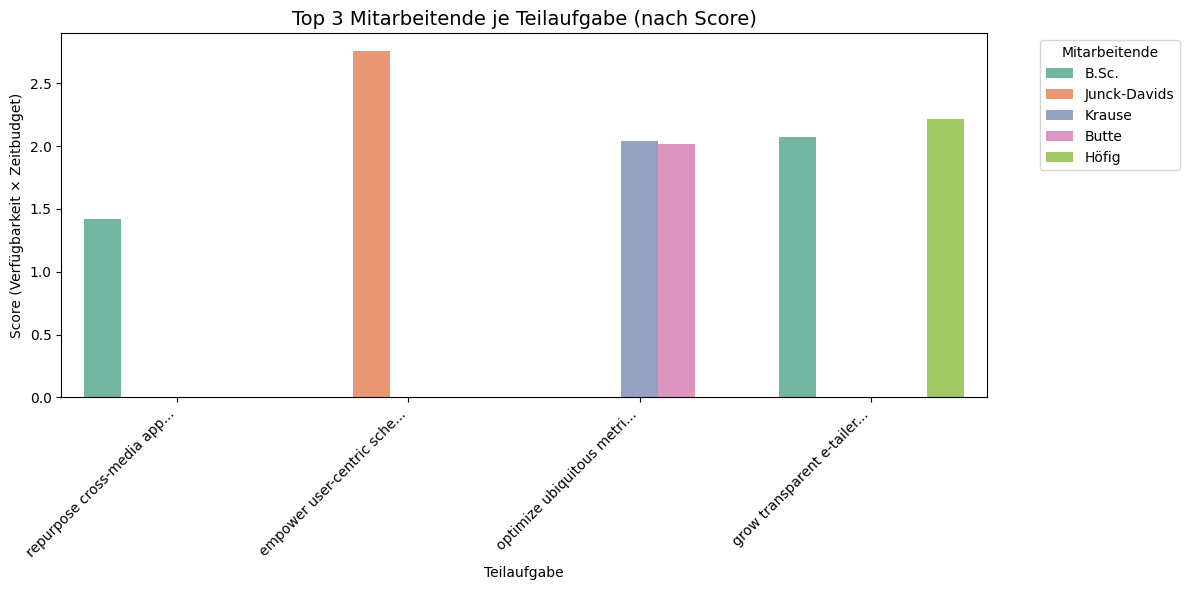

In [ ]:
# Nur Daten mit Score > 0
df = df[df["score"] > 0]

# Prüfen, ob überhaupt Daten übrig sind
if df.empty:
    print("Keine Ergebnisse mit Score > 0 gefunden.")
else:
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df,
        x="teilaufgabe_kurz",
        y="score",
        hue="name_kurz",
        palette="Set2"
    )
    plt.title("Top 3 Mitarbeitende je Teilaufgabe (nach Score)", fontsize=14)
    plt.ylabel("Score (Verfügbarkeit × Zeitbudget)")
    plt.xlabel("Teilaufgabe")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Mitarbeitende", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
